# Movie Director's Office
---
- **topic**: Investment opportunity assessment
- **client**: [Sequoia](https://www.sequoiacap.com/)
- **oppotunity**: [Universal Pictures](https://www.universalpictures.com/) has offered Sequoia to buy options for the movie rights of the upcoming movies of their Dark Universe franchise.
---

## Scope of the project

The Dark Universe is a franchise of monster movies produced by Universal Pictures. If the concept was promising, latest release such as `Dracula Untold` were not as successful as expected. The franchise seems in difficulty as the production studio has scrapped Bride of Frankenstein, Frankenstein's Monster, The Invisible Man, Dr. Jekyll & Mr. Hyde, Dracula Untold 2, and a remake of Van Helsing from its production schedule. The studio is willing to share the risk and potential reward with Sequoia buy selling bundled options for the upcoming movies rights.

Sequoia has a strong expertise in risky ventures and movies are risky ventures for sure. However, the studio has no track record in the movie industry and is looking for an external assessment of the opportunity.

Sequoia has reached out to the `Movie Director's Office` consultancy firm to answer the following question:

> Is it possible to predict the success of a movie before its release?

## Methodology

The consultancy firm has decided to use its existing data from [IMDb](https://www.imdb.com/), explore, and enrich it. Then, they'll try to predict the movie success to see if it is possible for Sequoia to de-risk the investment opportunity.

For this project, the team of consultants is multi-disciplinary and composed of:
- **Ben** who is a researcher and will help matching the data from IMDb with other sources (MDO_Researcher).
- **Elise** who is a statistician and will help understanding the data through statistical analysis (MDO_Statistician).
- **Marc** who is an agent and can provide insights on the movie industry (MDO_Agent).
- **Sarah** who is a forecaster and will see if the data can be used to predict the success of a movie (MDO_Forecaster).

In [22]:
import mdo

# The enriched data is the result of the team's work as will be explained below
enriched_data_path = 'mdo/data/enriched_data.csv'

# The team can thus use that data instead of the raw data (.from_enriched() class method)
Ben = mdo.MDO_Researcher.from_enriched(path=enriched_data_path)
Elise = mdo.MDO_Statistician.from_enriched(path=enriched_data_path)
Marc = mdo.MDO_Agent.from_enriched(path=enriched_data_path)
Sarah = mdo.MDO_Forecaster.from_enriched(path=enriched_data_path)

# Structure of the project

- [1. Success definition](#1.-Success-definition)

# 1. Success definition
*back to [table of contents](#Structure-of-the-project)*

The first step of the project is to define what success metrics to use. From their historical data, the consultants have identified two main options:
- **IMDb rating**: the rating of the movie on IMDb. This gives an idea of the success of the movie from the public perspective.
- **Box office**: the revenue generated by the movie. This gives an idea of the success of the movie from the industry perspective.

Elise suggested a few analyses to make the right choice. She proposed to:
- Analyze the correlation between both metrics to see if they could be used interchangeably.
- See if the IMDb rating are normally distributed and correctly differentiate good and bad movies. In fact, she read that the [IMDb ratings are skewed](https://www.freecodecamp.org/news/whose-reviews-should-you-trust-imdb-rotten-tomatoes-metacritic-or-fandango-7d1010c6cf19/) towards the high end.
- Have a look at the financial metrics of previous movies to see if we can identify any pattern.

In [19]:
# Correlation between the budget and the imdb score
Elise.get_correlation(target='imdb_score', predictors=["gross"])

,correlation_imdb_score,p-value,significant
gross,-0.098738,0.001387,1


If the rating and the box office are correlated, they have a negative correlation and cover two very different aspects of the movie success. They can therefore not be used interchangeably. 

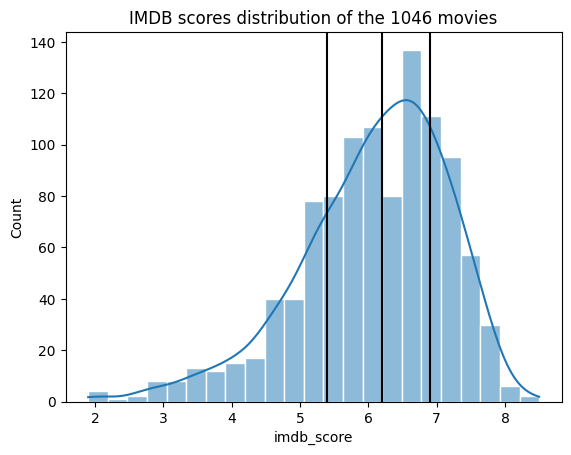

count    1046.000000
mean        6.080019
std         1.081826
min         1.900000
25%         5.400000
50%         6.200000
75%         6.900000
max         8.500000
Name: imdb_score, dtype: float64

In [20]:
# Are IMDB scores skewed?
Elise.get_dist_scores(plot=True)

The article Elise read was right. The IMDb ratings are indeed skewed towards the high end with 75% of the movies scoring more than 5.4/10. It therefore seems that poor movies are not well identified by the IMDb ratings.

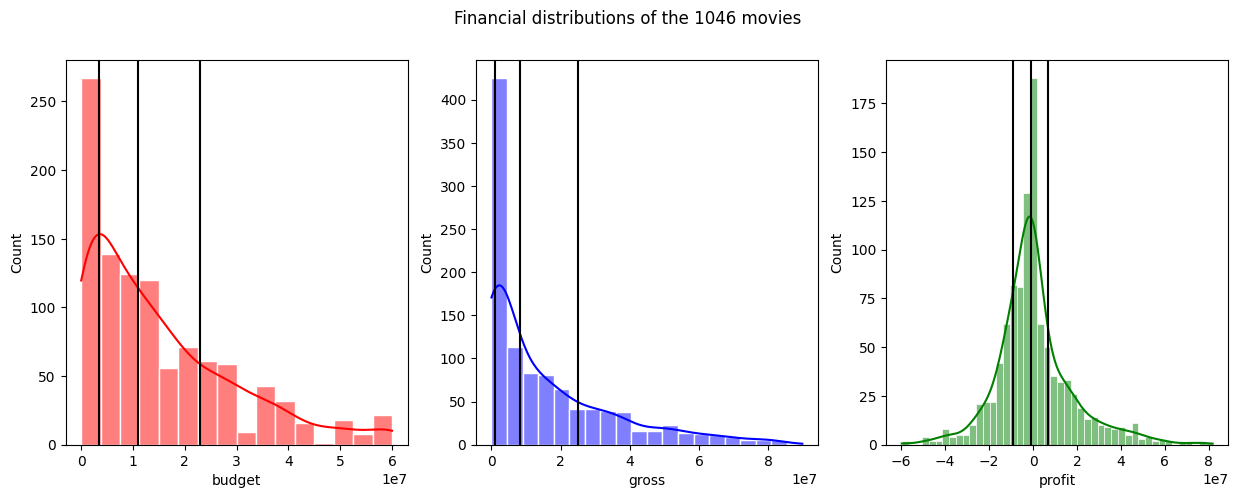

,budget,gross,profit
count,1046.0,1046.0,1046.0
mean,15357181.251434,15949503.660612,592322.409178
std,14503900.44725,19071006.471354,17600804.649789
min,218.0,703.0,-59768583.0
25%,3500000.0,1042200.75,-8928740.25
50%,11000000.0,8189048.5,-991797.5
75%,23000000.0,25031940.25,6783748.0
max,60000000.0,89808372.0,81700000.0
movie_highest,This Is It,"Legally Blonde 2: Red, White & Blonde",Pinocchio
movie_lowest,Tarnation,The Jimmy Show,The Swindle


In [21]:
# Can we learn anything from the financials?
Elise.get_dist_financials(plot=True)

The historical financial metrics show big right tail for both the budget and the revenue. This means that there are a few movies with very high budgets and revenues and that these successes are not the norm and likely hard to predict. To support that conclusion, we notice that the profit generated by the movies looks quite random. In fact, the profit distribution is centered around 0 with almost as much chance to make a profit as to make a loss.

Elise's conclusion:
> The IMDb ratings are skewed and won't help to filter bad movies out. Moreover, the real challenge for Sequoia is to know how much the movies will generate when they buy the options. We will therefore focus on predicting the box office (`gross`). However, Elise highlighted that this will be a challenging task as the successful movies are in the right tail of the distribution and are hard to predict.

## 2. Understanding the drivers of success
*back to [table of contents](#Structure-of-the-project)*